In [ ]:
#당뇨병 수치 예측

In [3]:
from sklearn.datasets import load_diabetes
data = load_diabetes()
df_X = data.data
df_y = data.target

In [4]:
import numpy as np

X = np.array(df_X)

print(type(X), X.dtype)

<class 'numpy.ndarray'> float64


In [5]:
y = np.array(df_y)

print(type(y), y.dtype)

<class 'numpy.ndarray'> float64


In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(353, 10) (353,)
(89, 10) (89,)


In [7]:
W = np.random.rand(X_train.shape[1])
b = np.random.rand()

print(len(W))

10


In [8]:
def model(X, W, b):
    predictions = 0
    for i in range(X.shape[1]):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions

In [9]:
def MSE(a, b):
    mse = ((a - b) ** 2).mean()  # 두 값의 차이의 제곱의 평균
    return mse

In [10]:
def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(predictions, y)
    return L

In [11]:
def gradient(X, W, b, y):
    N = len(y)

    y_pred = model(X, W, b)

    dW = 1/N * 2 * X.T.dot(y_pred - y)

    db = 2 * (y_pred - y).mean()
    return dW, db

In [12]:
LEARNING_RATE = 0.01

In [15]:
%%timeit -n 1 -r 1
global W, b

losses = []

for i in range(1, 30001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    if i % 100 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))

Iteration 100 : Loss 3092.6353
Iteration 200 : Loss 3090.8466
Iteration 300 : Loss 3089.0763
Iteration 400 : Loss 3087.3242
Iteration 500 : Loss 3085.5900
Iteration 600 : Loss 3083.8736
Iteration 700 : Loss 3082.1748
Iteration 800 : Loss 3080.4933
Iteration 900 : Loss 3078.8288
Iteration 1000 : Loss 3077.1813
Iteration 1100 : Loss 3075.5505
Iteration 1200 : Loss 3073.9362
Iteration 1300 : Loss 3072.3382
Iteration 1400 : Loss 3070.7563
Iteration 1500 : Loss 3069.1903
Iteration 1600 : Loss 3067.6400
Iteration 1700 : Loss 3066.1053
Iteration 1800 : Loss 3064.5860
Iteration 1900 : Loss 3063.0818
Iteration 2000 : Loss 3061.5927
Iteration 2100 : Loss 3060.1184
Iteration 2200 : Loss 3058.6588
Iteration 2300 : Loss 3057.2136
Iteration 2400 : Loss 3055.7829
Iteration 2500 : Loss 3054.3662
Iteration 2600 : Loss 3052.9636
Iteration 2700 : Loss 3051.5748
Iteration 2800 : Loss 3050.1998
Iteration 2900 : Loss 3048.8382
Iteration 3000 : Loss 3047.4901
Iteration 3100 : Loss 3046.1552
Iteration 3200 : 

In [16]:
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

np.float64(2867.0831832060735)

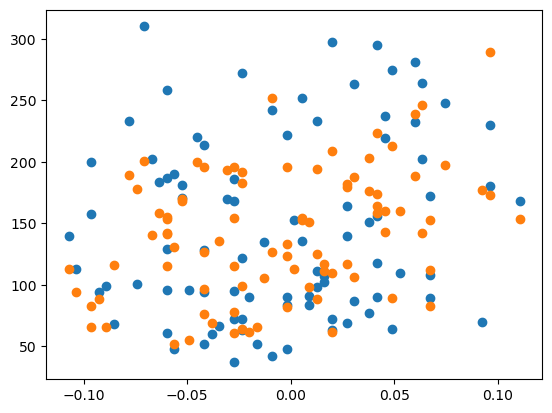

In [17]:
import matplotlib.pyplot as plt

plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)
plt.show()

In [ ]:
# 자전거 수요 에측

In [1]:
import pandas as pd

train = pd.read_csv("~/data/data/bike-sharing-demand/train.csv") 
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [2]:
train['datetime'] = pd.to_datetime(train['datetime'])
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['minute'] = train['datetime'].dt.minute
train['second'] = train['datetime'].dt.second

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  year        10886 non-null  int32         
 13  month       10886 non-null  int32         
 14  day         10886 non-null  int32         
 15  hour        10886 non-null  int32         
 16  minute      10886 non-

In [3]:
train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
year          0
month         0
day           0
hour          0
minute        0
second        0
dtype: int64

In [12]:
import pandas as pd
import numpy as np
from scipy.stats import zscore

# 1) 수치형 컬럼 리스트 추출
num_cols = train.select_dtypes(include=np.number).columns.tolist()

# 2) 각 컬럼별 Z-score 계산
#    df[num_cols].apply(zscore) 는 각 컬럼에 대해 (x - 평균)/표준편차 를 계산
z_scores = train[num_cols].apply(zscore)

# 3) 이상치 마스크 생성: 하나라도 절댓값이 threshold 넘으면 True
threshold = 3.0
outlier_mask = (z_scores.abs() > threshold).any(axis=1)

# 4) 이상치 인덱스 추출
outlier_indices = train.index[outlier_mask]
print(f"총 이상치 개수: {len(outlier_indices)}")

# 5a) 이상치 제거한 DataFrame
df_clean = train.loc[~outlier_mask].reset_index(drop=True)

# 5b) (선택) 이상치만 모아보기
df_outliers = train.loc[outlier_mask].reset_index(drop=True)

# — 예시 출력 —
print("Cleaned DataFrame shape:", df_clean.shape)
print("Outliers DataFrame shape:", df_outliers.shape)

train.drop(index=outlier_indices, inplace=True)
train.reset_index(drop=True, inplace=True)
print("train shape (in-place 제거 후):", train.shape)



총 이상치 개수: 910
Cleaned DataFrame shape: (9976, 18)
Outliers DataFrame shape: (910, 18)
train shape (in-place 제거 후): (9976, 18)


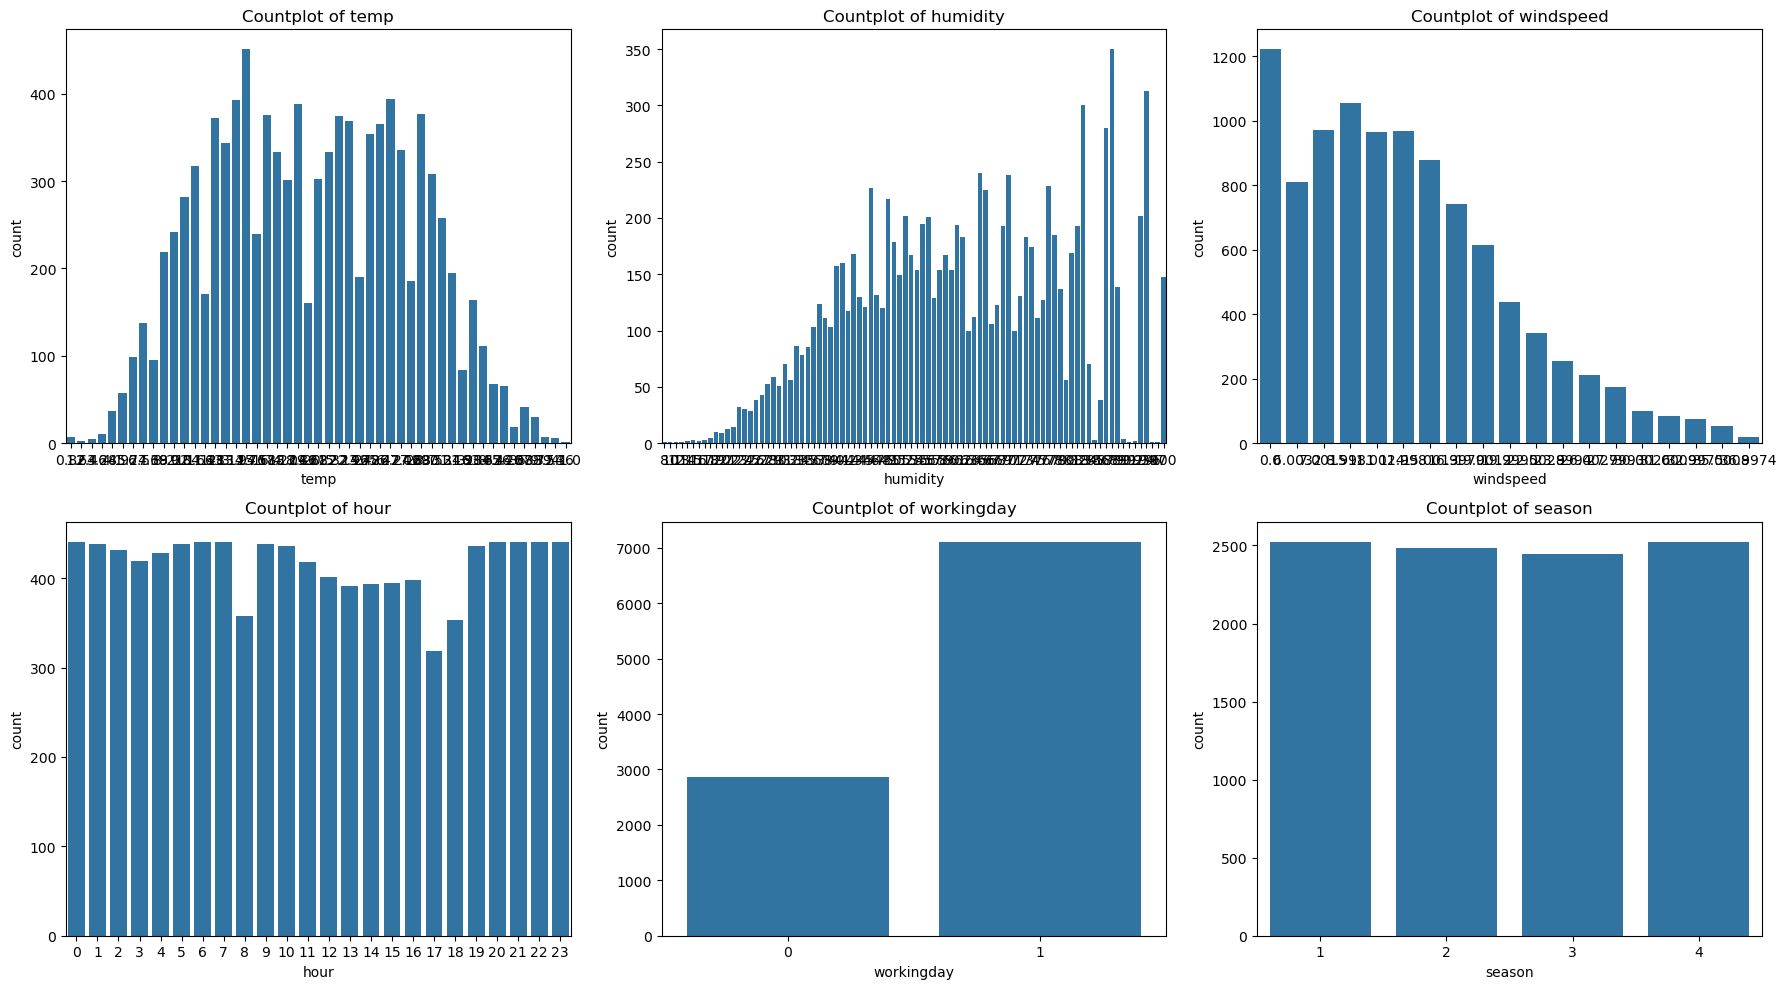

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(2, 3, figsize=(18, 10))
cols = ['temp', 'humidity', 'windspeed', 'hour', 'workingday', 'season']
for ax, col in zip(axs.flatten(), cols):
    sns.countplot(x=col, data=train, ax=ax)
    ax.set_title(f'Countplot of {col}')
plt.tight_layout()
plt.show()

In [14]:
features = ['temp', 'humidity', 'windspeed', 'hour', 'workingday', 'season']
X = train[features]
y = train['count']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [15]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [20]:
from sklearn.metrics import mean_squared_error
import numpy as np

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("MSE:", mse)
print("RMSE:", rmse)

MSE: 14967.998374118704
RMSE: 122.34377129269272


count    9976.000000
mean      168.686447
std       149.592570
min         1.000000
25%        38.000000
50%       134.000000
75%       259.250000
max       729.000000
Name: count, dtype: float64


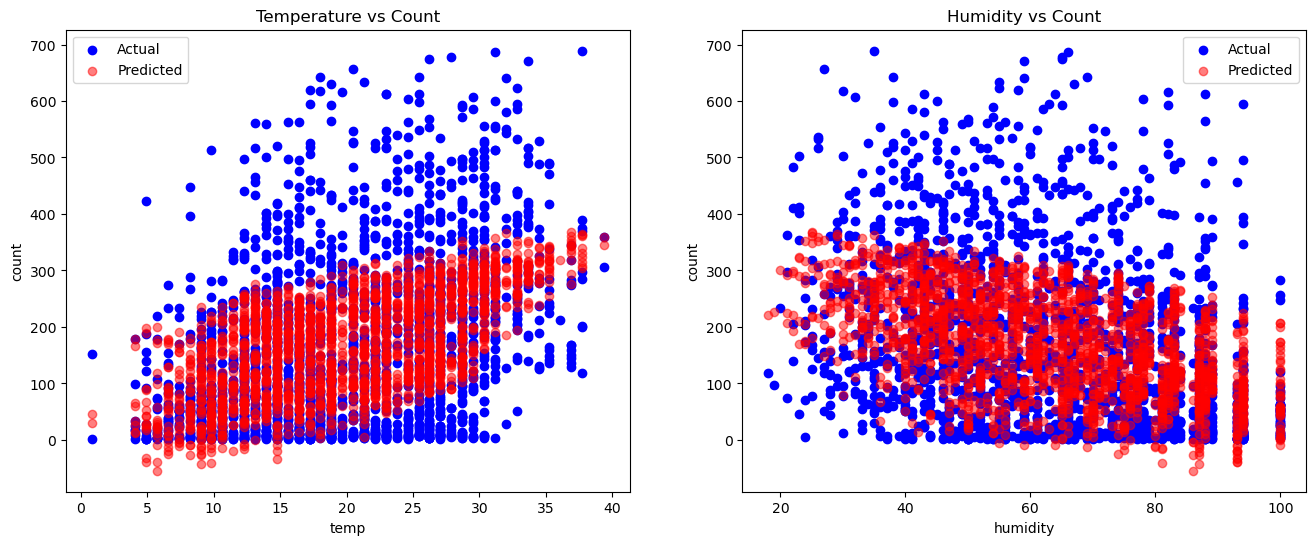

In [24]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# temp vs count 시각화
axs[0].scatter(X_test['temp'], y_test, color='blue', label='Actual')
axs[0].scatter(X_test['temp'], y_pred, color='red', label='Predicted', alpha=0.5)
axs[0].set_xlabel('temp')
axs[0].set_ylabel('count')
axs[0].set_title('Temperature vs Count')
axs[0].legend()

# humidity vs count 시각화
axs[1].scatter(X_test['humidity'], y_test,  color='blue', label='Actual')
axs[1].scatter(X_test['humidity'], y_pred,  color='red',  label='Predicted', alpha=0.5)
print(train['count'].describe())

axs[1].set_xlabel('humidity')
axs[1].set_ylabel('count')
axs[1].set_title('Humidity vs Count')
axs[1].legend()

In [18]:
print(train['count'].describe())


count    9976.000000
mean      168.686447
std       149.592570
min         1.000000
25%        38.000000
50%       134.000000
75%       259.250000
max       729.000000
Name: count, dtype: float64
